<a href="https://colab.research.google.com/github/LaraFupa/git_test/blob/master/E_comerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis de E-comerce olistic (Brasil)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_customers_dataset.csv")
geo = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_geolocation_dataset.csv")
items = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_order_items_dataset.csv")
payments = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_order_payments_dataset.csv")
reviews = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_order_reviews_dataset.csv")
orders = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_orders_dataset.csv")
products = pd. read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_products_dataset.csv")
sellers = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/olist_sellers_dataset.csv")
prod_categories_trans = pd.read_csv("/content/drive/MyDrive/Big Data Curso /Data /archive (1)/product_category_name_translation.csv")


In [3]:
orders
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

<Axes: xlabel='count', ylabel='order_status'>

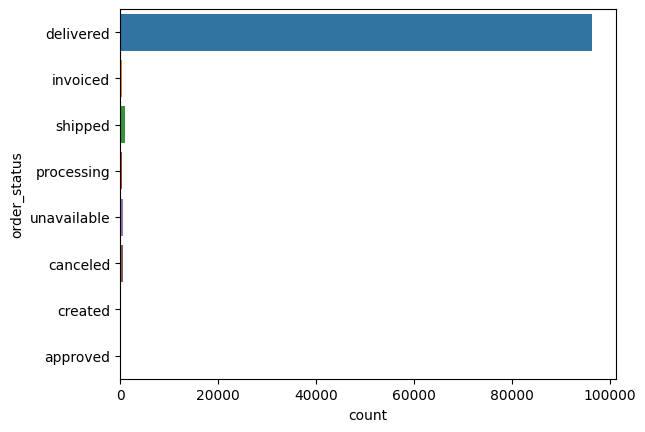

In [4]:
sns.countplot(y = 'order_status', data = orders)

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [6]:
# Agrupar los orders según su status y hacer un conteo y ordenarlos
# en orden descendiente (de mayor a menor número de orders según su status)
# Agrupar segun una variable - groupby()
# Ordenar en orden descendiente - sort_values(ascending = False)
status = orders.groupby('order_status')['order_id'].nunique().sort_values(ascending = False)
status

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [7]:
# Unir items con products por product_id - merge
item_product = pd.merge(items, products, on = 'product_id') #inner join
item_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [8]:
# Unir items con products por product_id - merge
item_product = pd.merge( items, products, on = 'product_id', how = 'left') #left join
item_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [9]:
most_product = item_product.groupby('product_category_name').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by = 'order_count', ascending = False).reset_index()
most_product

,product_category_name,order_count
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
...,...,...
68,cds_dvds_musicais,14
69,la_cuisine,14
70,pc_gamer,9
71,fashion_roupa_infanto_juvenil,8


In [10]:
most_product[:10]

,product_category_name,order_count
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


<Axes: xlabel='order_count', ylabel='product_category_name'>

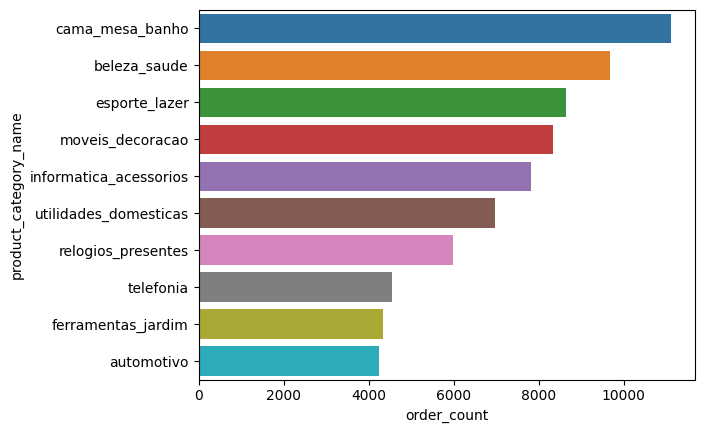

In [11]:
sns.barplot(x = 'order_count' , y= 'product_category_name', data= most_product[:10])

In [12]:
import datetime as dt
import calendar

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
# tenemos que transformar order_purchase_timestamp en datetime en lugar de texto.
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [15]:
orders['weekday'] = orders['order_purchase_timestamp'].dt.weekday
orders.weekday.unique()

array([0, 1, 2, 5, 6, 3, 4])

el o representa al DOMINGO

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   weekday                        99441 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 6.8+ MB


In [17]:
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['monthday'] = orders['order_purchase_timestamp'].dt.day
orders['weekday'] = orders['order_purchase_timestamp'].dt.weekday
orders['week'] = orders['order_purchase_timestamp'].dt.week
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['year'] = orders['order_purchase_timestamp'].dt.year

<ipython-input-17-fe19f33094f4>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders['week'] = orders['order_purchase_timestamp'].dt.week


In [18]:
orders_by_year = orders.groupby('year').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count_by_year'}).reset_index()

In [19]:
orders_by_year

,year,order_count_by_year
0,2016,329
1,2017,45101
2,2018,54011


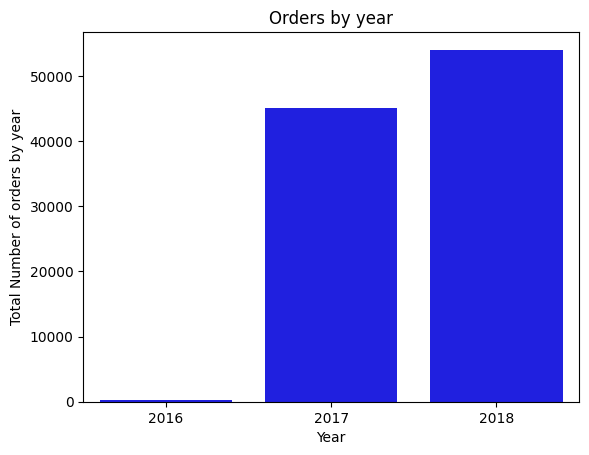

In [20]:
sns.barplot(x = 'year', y = 'order_count_by_year' , data = orders_by_year, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Total Number of orders by year')
plt.title('Orders by year')
plt.show()